### Video Games Sales

#### Background:
With the COVID-19 pandemic the number of people staying at home has increased. Virous sources report that the time people spent playing video games has increased as well. This trend is expected to continue. A small video games developer startup wants to capitalize on the current condition and wants to create a top-selling game. They do not have data scientist on staff and has contracted us to help them identify what game(s) they should focus on developing. 

#### Problem Statement:
The company has a great develpers team capable of developing games for any gaming platform and any genre. However, their resources are limited and can develop only one game within a period of 1-2 years. Thus the goeal is to determine what game based on genre, platform, ESRB rating and publisher has very high likelihood to be a best seller.

#### Our Task:
Analyze the available data and create a model to predict which features as listed above are most likely to make a top selling game. We need to present our results and make a recommendation to the company top management team within 4 weeks.

#### Currently Available Data:
We have data for sales of large number of video games (55,792 records) as of April 12th, 2019. Source of data: Kaggle, https://www.kaggle.com/ashaheedq/video-games-sales-2019, “vgsales-12-4-2019.csv” with the following fields:
- Rank - Ranking of overall sales
- Name - Name of the game
- Platform - Platform of the game (i.e. PC, PS4, XOne, etc.)
- Genre - Genre of the game
- ESRB Rating - ESRB Rating of the game
- Publisher - Publisher of the game
- Developer - Developer of the game
- Critic Score - Critic score of the game from 10
- User Score - Users score the game from 10
- Total Shipped - Total shipped copies of the game
- Global_Sales - Total worldwide sales (in millions)
- NA_Sales - Sales in North America (in millions)
- PAL_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Year - Year of release of the game.

##### Key independent features are:
'Platform', 'Genre', 'Publisher', 'Year', 'ESRB Rating'

##### Features which belong in the target group:
'Total_Shipped', '*_Sales' (all Sales columns), 'Critic_Score',  'User_Score'

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Import necessary libraries and packages

In [1]:
import numpy as np
import pandas as pd

import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'whitegrid', font_scale = 1.5)

In [2]:
# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

#### Read data

In [3]:
data = pd.read_csv('vgsales-12-4-2019.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

In [4]:
# Data preview

data.head(10)

Rank                                Name                      basename  \
0     1                          Wii Sports                    wii-sports   
1     2                   Super Mario Bros.              super-mario-bros   
2     3                      Mario Kart Wii                mario-kart-wii   
3     4       PlayerUnknown's Battlegrounds  playerunknowns-battlegrounds   
4     5                   Wii Sports Resort             wii-sports-resort   
5     6  Pokemon Red / Green / Blue Version                    pokmon-red   
6     7               New Super Mario Bros.          new-super-mario-bros   
7     8                              Tetris                        tetris   
8     9           New Super Mario Bros. Wii      new-super-mario-bros-wii   
9    10                           Minecraft                     minecraft   

          Genre ESRB_Rating Platform         Publisher              Developer  \
0        Sports           E      Wii          Nintendo           Nintendo EAD   
1      Platform         NaN      NES          Nintendo           Nintendo EAD   
2        Racing           E      Wii          Nintendo           Nintendo EAD   
3       Shooter         NaN       PC  PUBG Corporation       PUBG Corporation   
4        Sports           E      Wii          Nintendo           Nintendo EAD   
5  Role-Playing           E       GB          Nintendo             Game Freak   
6      Platform           E       DS          Nintendo           Nintendo EAD   
7        Puzzle           E       GB          Nintendo  Bullet Proof Software   
8      Platform           E      Wii          Nintendo           Nintendo EAD   
9          Misc         NaN       PC            Mojang              Mojang AB   

   VGChartz_Score  Critic_Score  ...  NA_Sales  PAL_Sales  JP_Sales  \
0             NaN           7.7  ...       NaN        NaN       NaN   
1             NaN          10.0  ...       NaN        NaN       NaN   
2             NaN           8.2  ...       NaN        NaN       NaN   
3             NaN           NaN  ...       NaN        NaN       NaN   
4             NaN           8.0  ...       NaN        NaN       NaN   
5             NaN           9.4  ...       NaN        NaN       NaN   
6             NaN           9.1  ...       NaN        NaN       NaN   
7             NaN           NaN  ...       NaN        NaN       NaN   
8             NaN           8.6  ...       NaN        NaN       NaN   
9             NaN          10.0  ...       NaN        NaN       NaN   

   Other_Sales    Year  Last_Update  \
0          NaN  2006.0          NaN   
1          NaN  1985.0          NaN   
2          NaN  2008.0  11th Apr 18   
3          NaN  2017.0  13th Nov 18   
4          NaN  2009.0          NaN   
5          NaN  1998.0          NaN   
6          NaN  2006.0          NaN   
7          NaN  1989.0          NaN   
8          NaN  2009.0          NaN   
9          NaN  2010.0  05th Aug 18   

                                                 url  status Vgchartzscore  \
0  http://www.vgchartz.com/game/2667/wii-sports/?...       1           NaN   
1  http://www.vgchartz.com/game/6455/super-mario-...       1           NaN   
2  http://www.vgchartz.com/game/6968/mario-kart-w...       1           8.7   
3  http://www.vgchartz.com/game/215988/playerunkn...       1           NaN   
4  http://www.vgchartz.com/game/24656/wii-sports-...       1           8.8   
5  http://www.vgchartz.com/game/4030/pokemon-red-...       1           NaN   
6  http://www.vgchartz.com/game/1582/new-super-ma...       1           NaN   
7  http://www.vgchartz.com/game/4534/tetris/?regi...       1           NaN   
8  http://www.vgchartz.com/game/35076/new-super-m...       1           9.1   
9  http://www.vgchartz.com/game/47724/minecraft/?...       1           NaN   

                                          img_url  
0   /games/boxart/full_2258645AmericaFrontccc.jpg  
1                    /games/boxart/8972270ccc.jpg  
2   /games/boxart/full_8932480Americ

#### Create data profile without saving
The code below will be commented out for posting on GitHub repository.
To run the data profiling code, please un-comment.

In [5]:
#report = data.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
#report

### Observations

#### Missing Values
- All 'Score' columns have extremely large number of missing values and will be dropped
- 'Total_Shipped' column also is missing more than 96% of its values and will be dropped together with 'Rank' which is derived based on 'Total_Shipped' value

#### Redundancy
- 'Name' and 'basename' columns are equivalent - drop 'Name'

#### Irrelevant Features
- The following features - 'Last_Update', 'url', 'status', and 'img_url' - do not provide relevant information and will be dropped

#### Features selected for further analysis
- 'basename', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Developer', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Year'

In [6]:
# Create data subset, data_1, with above features for further analysis
features_1 = ['basename', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Developer', 
                     'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Year']
data_1 = data[features_1]
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   basename      55792 non-null  object 
 1   Genre         55792 non-null  object 
 2   ESRB_Rating   23623 non-null  object 
 3   Platform      55792 non-null  object 
 4   Publisher     55792 non-null  object 
 5   Developer     55775 non-null  object 
 6   Global_Sales  19415 non-null  float64
 7   NA_Sales      12964 non-null  float64
 8   PAL_Sales     13189 non-null  float64
 9   JP_Sales      7043 non-null   float64
 10  Other_Sales   15522 non-null  float64
 11  Year          54813 non-null  float64
dtypes: float64(6), object(6)
memory usage: 5.1+ MB


In [7]:
data_1.head(10)

basename         Genre ESRB_Rating Platform  \
0                    wii-sports        Sports           E      Wii   
1              super-mario-bros      Platform         NaN      NES   
2                mario-kart-wii        Racing           E      Wii   
3  playerunknowns-battlegrounds       Shooter         NaN       PC   
4             wii-sports-resort        Sports           E      Wii   
5                    pokmon-red  Role-Playing           E       GB   
6          new-super-mario-bros      Platform           E       DS   
7                        tetris        Puzzle           E       GB   
8      new-super-mario-bros-wii      Platform           E      Wii   
9                     minecraft          Misc         NaN       PC   

          Publisher              Developer  Global_Sales  NA_Sales  PAL_Sales  \
0          Nintendo           Nintendo EAD           NaN       NaN        NaN   
1          Nintendo           Nintendo EAD           NaN       NaN        NaN   
2          Nintendo           Nintendo EAD           NaN       NaN        NaN   
3  PUBG Corporation       PUBG Corporation           NaN       NaN        NaN   
4          Nintendo           Nintendo EAD           NaN       NaN        NaN   
5          Nintendo             Game Freak           NaN       NaN        NaN   
6          Nintendo           Nintendo EAD           NaN       NaN        NaN   
7          Nintendo  Bullet Proof Software           NaN       NaN        NaN   
8          Nintendo           Nintendo EAD           NaN       NaN        NaN   
9            Mojang              Mojang AB           NaN       NaN        NaN   

   JP_Sales  Other_Sales    Year  
0       NaN          NaN  2006.0  
1       NaN          NaN  1985.0  
2       NaN          NaN  2008.0  
3       NaN          NaN  2017.0  
4       NaN          NaN  2009.0  
5       NaN          NaN  1998.0  
6       NaN          NaN  2006.0  
7       NaN          NaN  1989.0  
8       NaN          NaN  2009.0  
9       NaN          NaN  2010.0

#### Create data profile without saving
The code below will be commented out for posting on GitHub repository.
To run the data profiling code, please un-comment.

In [8]:
#report = data_1.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
#report

### Preliminary Analysis
- Use only 'Global_Sales' as target variable due to high correlation for all 'sales' columns (except Japan)
- Use 'Genre', 'ESRB_Rating', 'Platform', and 'Publisher' as independent variables 
    - 'Developer' is not relevant here because we are not looking to select best developer
- Filter data by dropping all nulls in 'Global_Sales' and 'Year'
    - These cannot be filled

#### Create new data subset, data_2, with the above features

In [9]:
features_2 = ['Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Global_Sales', 'Year']

data_2 = data[features_2]
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Genre         55792 non-null  object 
 1   ESRB_Rating   23623 non-null  object 
 2   Platform      55792 non-null  object 
 3   Publisher     55792 non-null  object 
 4   Global_Sales  19415 non-null  float64
 5   Year          54813 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.6+ MB


#### Apply filter to eliminate nulls in 'Global_Sales' and 'Year'

In [10]:
mask = data_2['Global_Sales'].isnull() | data_2['Year'].isnull()
data_2 = data_2[~mask]
data_2.reset_index(inplace = True, drop = True)

data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19377 entries, 0 to 19376
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Genre         19377 non-null  object 
 1   ESRB_Rating   13792 non-null  object 
 2   Platform      19377 non-null  object 
 3   Publisher     19377 non-null  object 
 4   Global_Sales  19377 non-null  float64
 5   Year          19377 non-null  float64
dtypes: float64(2), object(4)
memory usage: 908.4+ KB


In [11]:
data_2.head(10)

Genre ESRB_Rating Platform       Publisher  Global_Sales    Year
0            Action           M      PS3  Rockstar Games         20.32  2013.0
1            Action           M      PS4  Rockstar Games         19.39  2014.0
2            Action           M      PS2  Rockstar Games         16.15  2002.0
3            Action           M     X360  Rockstar Games         15.86  2013.0
4           Shooter           M      PS4      Activision         15.09  2015.0
5           Shooter           M     X360      Activision         14.82  2011.0
6           Shooter           M     X360      Activision         14.74  2010.0
7  Action-Adventure           M      PS4  Rockstar Games         13.94  2018.0
8           Shooter           M     X360      Activision         13.86  2012.0
9           Shooter           M      PS3      Activision         13.80  2012.0

#### Examine 'Genre', 'ESRB_Rating', 'Platform', and 'Publisher'

#### Examine values of 'Genre'

In [12]:
# Get count of each genre as persentage of total number of data points

print(round(data_2['Genre'].value_counts() * 100 / len(data_2), 2))

Action              14.98
Sports              13.47
Misc                11.66
Adventure            9.84
Role-Playing         8.25
Shooter              7.81
Racing               7.42
Simulation           5.83
Platform             5.00
Fighting             4.64
Strategy             4.43
Puzzle               3.70
Action-Adventure     1.33
Music                0.74
Visual Novel         0.59
MMO                  0.17
Party                0.13
Board Game           0.01
Education            0.01
Sandbox              0.01
Name: Genre, dtype: float64


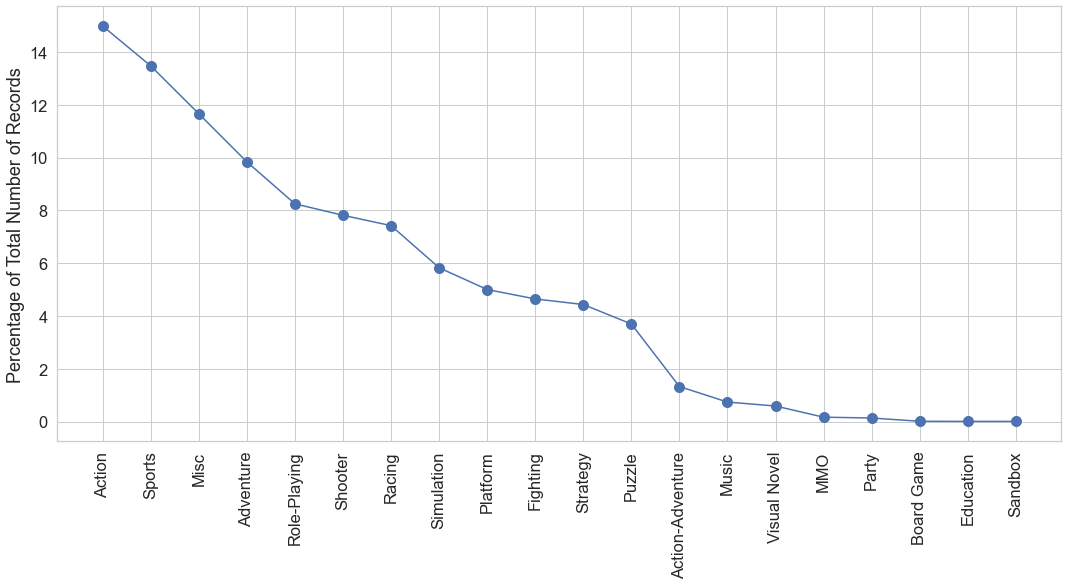

In [13]:
# Visualize in a plot

plt.figure(figsize = (18, 8))
plt.plot(data_2['Genre'].value_counts() * 100 / len(data_2), marker='o', markersize = 10)
plt.ylabel('Percentage of Total Number of Records')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

#####  For future analysis: Set cut-off of 1 to eliminate genres which account for less than 1 % of the total number of records

#### Examine values of 'ESRB_Rating'

In [14]:
# Get count of each rating category as persentage of total number of data points

print(round(data_2['ESRB_Rating'].value_counts() * 100 / len(data_2), 2))

E      30.30
T      20.40
M      10.63
E10     9.51
RP      0.21
EC      0.14
Name: ESRB_Rating, dtype: float64


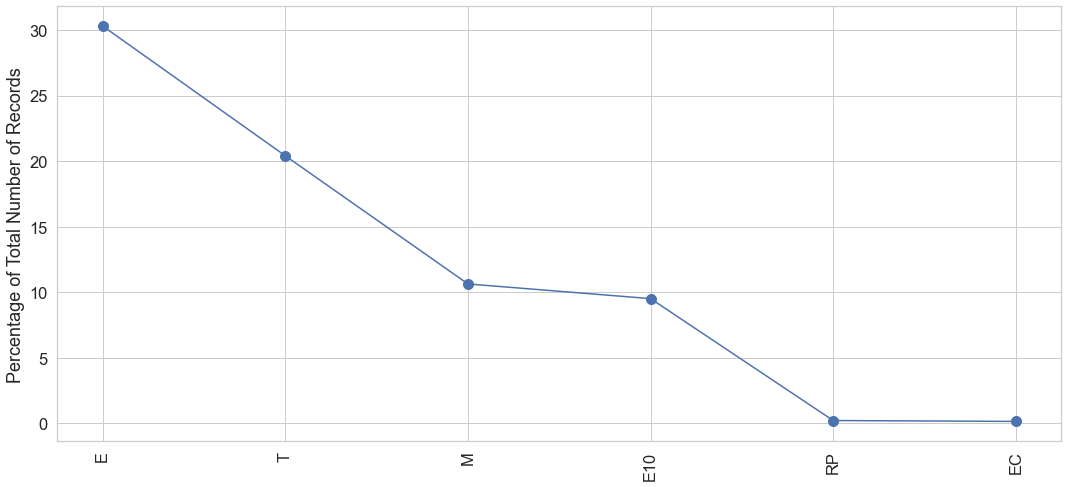

In [15]:
# Visualize in a plot

plt.figure(figsize = (18, 8))
plt.plot(data_2['ESRB_Rating'].value_counts() * 100 / len(data_2), marker='o', markersize = 10)
plt.ylabel('Percentage of Total Number of Records')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

#####  For future analysis: Set cut-off of 1 to eliminate rating categories which account for less than 1 % of the total number of records

#### Examine values of 'Platform'

In [16]:
# Get count of each gaming platform as persentage of total number of data points

print(round(data_2['Platform'].value_counts() * 100 / len(data_2), 2))

DS      12.50
PS2     11.33
PC       8.44
PS3      7.11
Wii      7.11
PSP      7.09
X360     6.80
PS       6.09
PS4      4.81
GBA      4.69
XB       4.35
PSV      3.54
3DS      3.03
XOne     2.76
GC       2.74
N64      1.48
NS       1.44
SNES     1.05
SAT      0.90
WiiU     0.77
2600     0.68
GB       0.27
DC       0.26
NES      0.24
GEN      0.14
PSN      0.08
NG       0.06
XBL      0.05
WS       0.04
VC       0.03
SCD      0.03
Mob      0.02
3DO      0.02
GBC      0.02
PCE      0.01
WW       0.01
OSX      0.01
PCFX     0.01
GG       0.01
Name: Platform, dtype: float64


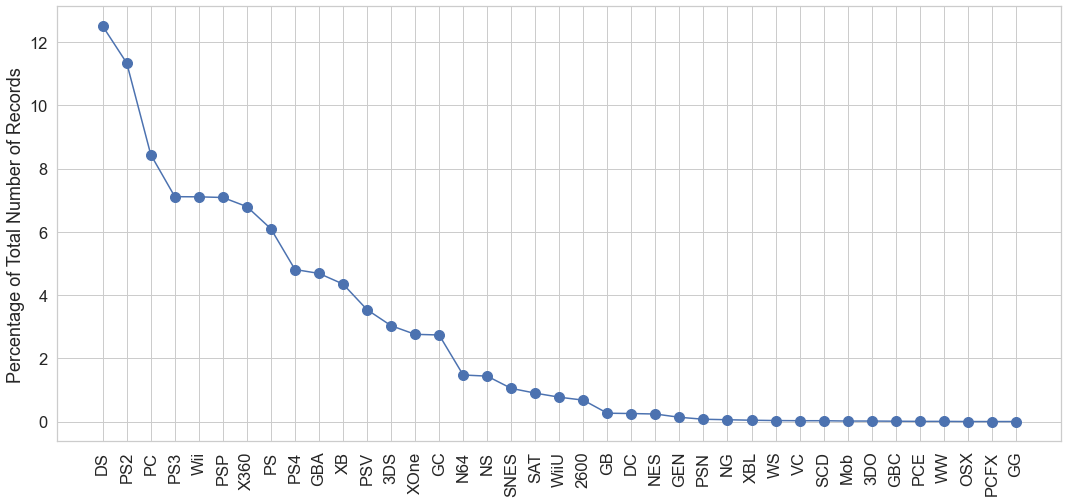

In [17]:
# Visualize in a plot

plt.figure(figsize = (18, 8))
plt.plot(data_2['Platform'].value_counts() * 100 / len(data_2), marker='o', markersize = 10)
plt.ylabel('Percentage of Total Number of Records')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

#####  For future analysis: Set cut-off of 1 to eliminate gaming platforms which account for less than 1 % of the total number of records

#### Examine values of 'Publisher'

In [18]:
# Get count of each publisher as persentage of total number of data points

print(round(data_2['Publisher'].value_counts() * 100 / len(data_2), 2))

Activision                  5.42
Ubisoft                     5.27
Electronic Arts             4.43
Konami                      4.07
THQ                         3.81
                            ... 
Office Create               0.01
Hiromi                      0.01
Game Factory Interactive    0.01
989 Sports                  0.01
TOHO                        0.01
Name: Publisher, Length: 744, dtype: float64


##### There are too many publishers (744) for a legible plot. For visualization purposes, plot only the top 50.

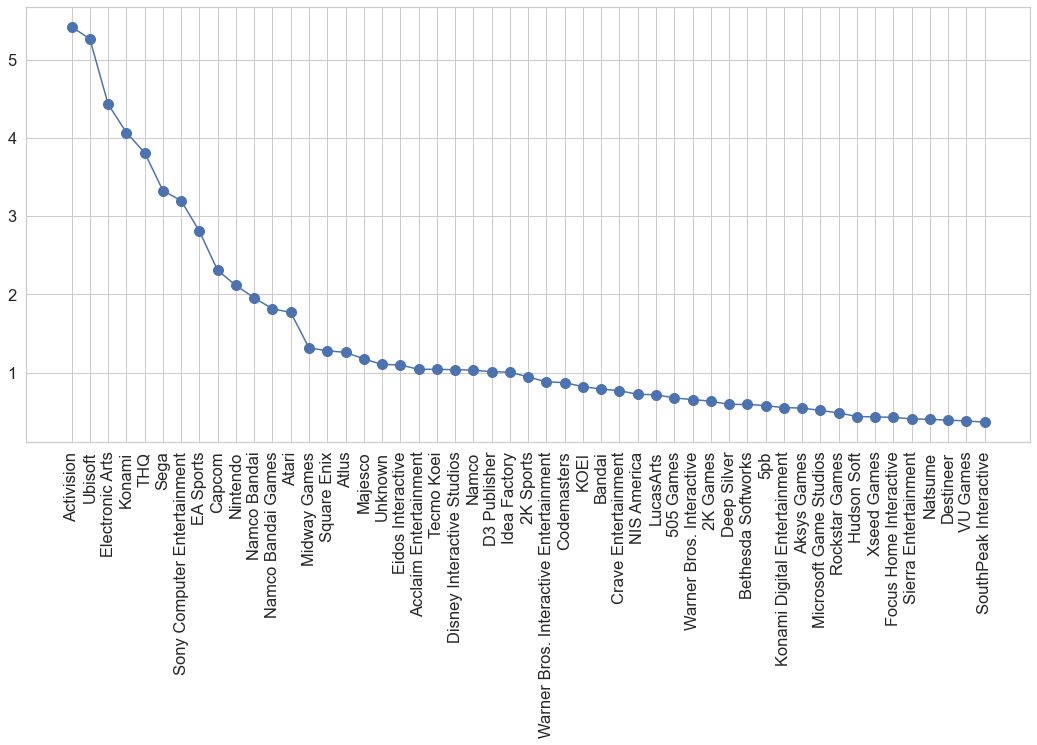

In [19]:
data_publisher_count = data_2['Publisher'].value_counts() * 100 / len(data_2)

plt.figure(figsize = (18, 8))
plt.plot(data_publisher_count[0:51], marker='o', markersize = 10)
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

#####  For future analysis: Set cut-off of 0.1 to eliminate publishers which account for less than 0.1 % of the total number of records

#### Filter data, data_2, using the respective cut-offs for 'Genre', 'ESRB_Rating', 'Platform', and 'Publisher'
- Threshold for 'Genre', 'ESRB_Rating', 'Platform' is 1 % of total number of data points
- Threshold for 'Publisher' is 0.1 % of total number of data points

#### Filter data_2 by 'Genre' with min_freq = 1.0

In [20]:
# Define frequency as percentage
freq_genre = data_2['Genre'].value_counts() * 100 / len(data_2)
print(round(freq_genre, 2))

Action              14.98
Sports              13.47
Misc                11.66
Adventure            9.84
Role-Playing         8.25
Shooter              7.81
Racing               7.42
Simulation           5.83
Platform             5.00
Fighting             4.64
Strategy             4.43
Puzzle               3.70
Action-Adventure     1.33
Music                0.74
Visual Novel         0.59
MMO                  0.17
Party                0.13
Board Game           0.01
Education            0.01
Sandbox              0.01
Name: Genre, dtype: float64


In [21]:
# Print list of genres to remain
print(list(freq_genre[freq_genre >= 1.0].index))

['Action', 'Sports', 'Misc', 'Adventure', 'Role-Playing', 'Shooter', 'Racing', 'Simulation', 'Platform', 'Fighting', 'Strategy', 'Puzzle', 'Action-Adventure']


In [22]:
# Create filter and filter data_2 by genre

mask_genre = data_2['Genre'].isin(list(freq_genre[freq_genre >= 1.0].index))

data_3 = data_2[mask]
data_3.reset_index(inplace = True, drop = True)
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Genre         1830 non-null   object 
 1   ESRB_Rating   1535 non-null   object 
 2   Platform      1830 non-null   object 
 3   Publisher     1830 non-null   object 
 4   Global_Sales  1830 non-null   float64
 5   Year          1830 non-null   float64
dtypes: float64(2), object(4)
memory usage: 85.9+ KB


In [23]:
# Check by comparing genre counts in data_3 vs. data_2

data_2['Genre'].value_counts()

Action              2903
Sports              2610
Misc                2259
Adventure           1906
Role-Playing        1598
Shooter             1514
Racing              1438
Simulation          1129
Platform             969
Fighting             900
Strategy             859
Puzzle               716
Action-Adventure     257
Music                143
Visual Novel         114
MMO                   32
Party                 26
Board Game             2
Education              1
Sandbox                1
Name: Genre, dtype: int64

In [24]:
data_3['Genre'].value_counts()

Sports              314
Action              310
Shooter             200
Misc                180
Racing              151
Role-Playing        137
Fighting            113
Adventure           106
Platform             97
Simulation           81
Strategy             51
Puzzle               40
Action-Adventure     32
Music                13
MMO                   2
Party                 2
Visual Novel          1
Name: Genre, dtype: int64

#### There is a problem with the filter using .isin():
- The filtered data includes genres which are not in the list used for filtering
- The value counts in filtered data is also way off

#### Could not solve the issue at the moment and looking for solution